In [ ]:
# I tried to use a simple CNN but clearly the results are shockingly poor. 
# The computational power on my PC was unable to support a ResNet50 based model, so I tried implementing it on Colab. 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from PIL import Image

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras import optimizers, layers, models
# from tensorflow.keras.applications import ResNet50

In [5]:
# import split_folders

In [6]:
# split_folders.ratio('D:\\Projects\\EuroSAT_RGB_Original', output="D:\\Projects\\EuroSAT_RGB_Split", seed=1337, ratio=(.8, .2))

In [7]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [8]:
train_data = image_generator.flow_from_directory('D:\\Projects\\EuroSAT_RGB_Split\\train', class_mode='categorical')
test_data = image_generator.flow_from_directory('D:\\Projects\\EuroSAT_RGB_Split\\val', class_mode='categorical')

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [9]:
sample_training_images, _ = next(train_data)

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

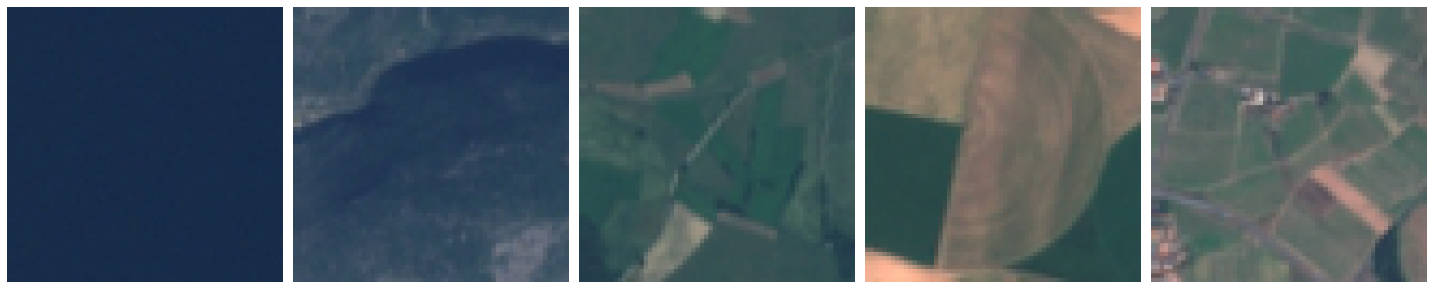

In [11]:
plotImages(sample_training_images[:5])

In [12]:
print('Training Data: ',train_data[0][0].shape)
print('Test Data: ',test_data[0][0].shape)

Training Data:  (32, 256, 256, 3)
Test Data:  (32, 256, 256, 3)


In [13]:
train_data[0][0][0].shape

(256, 256, 3)

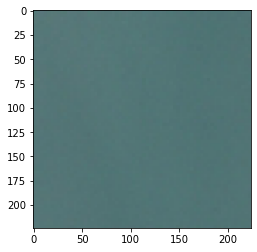

In [23]:
plt.imshow(train_data[0][0][0])

In [16]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
total_train = 21600
total_test = 5400
batch_size = 128

In [21]:
history = model.fit(
    train_data,
    steps_per_epoch=total_train // batch_size,
    epochs=20,
    validation_data=train_data,
    validation_steps=total_test // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 168 steps, validate for 42 steps
Epoch 1/20
168/168 [==============================] - 489s 3s/step - loss: 2.3483 - accuracy: 0.1125 - val_loss: 2.3637 - val_accuracy: 0.0975
Epoch 2/20
168/168 [==============================] - 384s 2s/step - loss: 2.3479 - accuracy: 0.1133 - val_loss: 2.3637 - val_accuracy: 0.0975
Epoch 3/20
168/168 [==============================] - 381s 2s/step - loss: 2.3453 - accuracy: 0.1159 - val_loss: 2.3637 - val_accuracy: 0.0975
Epoch 4/20
168/168 [==============================] - 380s 2s/step - loss: 2.3525 - accuracy: 0.1086 - val_loss: 2.3637 - val_accuracy: 0.0975
Epoch 5/20
168/168 [==============================] - 382s 2s/step - loss: 2.3505 - accuracy: 0.1107 - val_loss: 2.3637 - val_accuracy: 0.0975
Epoch 6/20
168/168 [==============================] - 382s 2s/step - loss: 2.3523 - accuracy: 0.1088 - val_loss: 2.3637 - val_accuracy: 0.0975
Epoch 7/20
168/168 [=============================

In [24]:

# Confusion Matrix and Classification report
# creating 
Y_pred = model.predict_generator(test_data, test_data.samples//32 +1 )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_data.classes, y_pred)
#print(cm)

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

df = cm2df(cm, ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential" ,"River", "SeaLake"])
print(df)

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
                      AnnualCrop  Forest  HerbaceousVegetation  Highway  \
AnnualCrop                   600       0                     0        0   
Forest                       600       0                     0        0   
HerbaceousVegetation         600       0                     0        0   
Highway                      500       0                     0        0   
Industrial                   500       0                     0        0   
Pasture                      400       0                     0        0   
PermanentCrop                500       0                     0        0   
Residential                  600       0                     0        0   
River                        500       0                     0        0   
SeaLake                      600       0                     0        0   

                      Industrial  Pasture  PermanentCrop  Residential  River 

In [8]:
# train_data = image_generator.flow_from_directory('D:\\Projects\\EuroSAT_RGB_Split\\train', target_size=(224,224), class_mode='categorical')
# test_data = image_generator.flow_from_directory('D:\\Projects\\EuroSAT_RGB_Split\\val', target_size=(224,224), class_mode='categorical')

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [9]:
# sample_training_images, _ = next(train_data)

In [10]:
# # This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 5, figsize=(20,20))
#     axes = axes.flatten()
#     for img, ax in zip( images_arr, axes):
#         ax.imshow(img)
#         ax.axis('off')
#     plt.tight_layout()
#     plt.show()

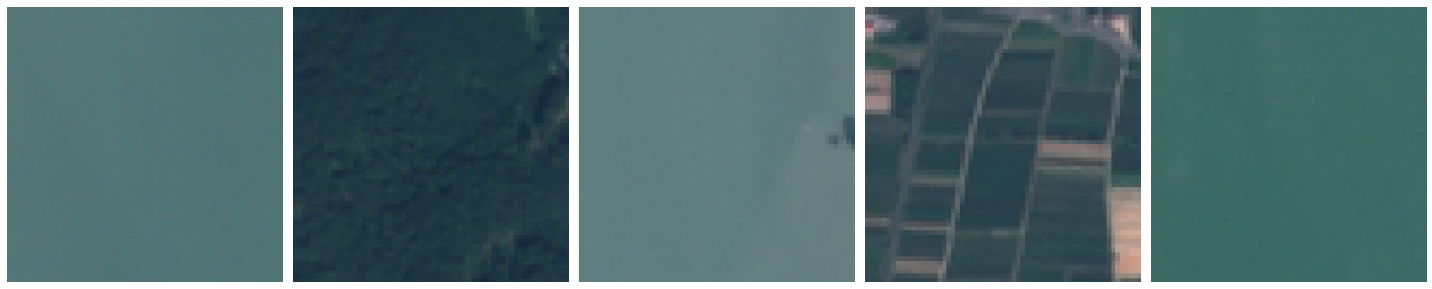

In [11]:
# plotImages(sample_training_images[:5])

In [12]:
# print('Training Data: ',train_data[0][0].shape)
# print('Test Data: ',test_data[0][0].shape)

Training Data:  (32, 224, 224, 3)
Test Data:  (32, 224, 224, 3)


In [13]:
# train_data[0][0][0].shape

(224, 224, 3)

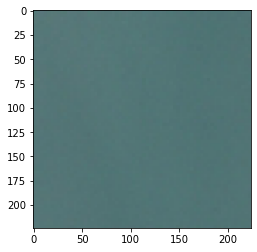

In [23]:
# plt.imshow(train_data[0][0][0])

In [15]:
# resnet_model = ResNet50(weights="imagenet")

In [16]:
# for layer in resnet_model.layers:
#     print(layer, layer.trainable)

In [17]:
# resnet_model.summary()

In [18]:
# rmodel = models.Sequential()

In [19]:
# rmodel.add(resnet_model)

# rmodel.add(layers.Flatten())
# rmodel.add(layers.Dense(1024, activation='relu'))
# rmodel.add(layers.Dropout(0.5))
# rmodel.add(layers.Dense(10, activation='softmax'))

In [20]:
# rmodel.compile(optimizer='adam',
#               loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [21]:
# total_train = 21600
# total_test = 5400
# batch_size = 128

In [22]:
# history = rmodel.fit(
#     train_data,
#     steps_per_epoch=total_train // batch_size,
#     epochs=20,
#     validation_data=train_data,
#     validation_steps=total_test // batch_size
# )

In [ ]:
# Dataset: https://madm.dfki.de/downloads EuroSAT RGB